### 1. k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` from a kmeans clustering (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)

2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them

3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.

4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fowlkes_mallows_score, adjusted_rand_score, normalized_mutual_info_score 
sns.set()

In [2]:
#1.1)

digits = load_digits()

kmeans = KMeans(10)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

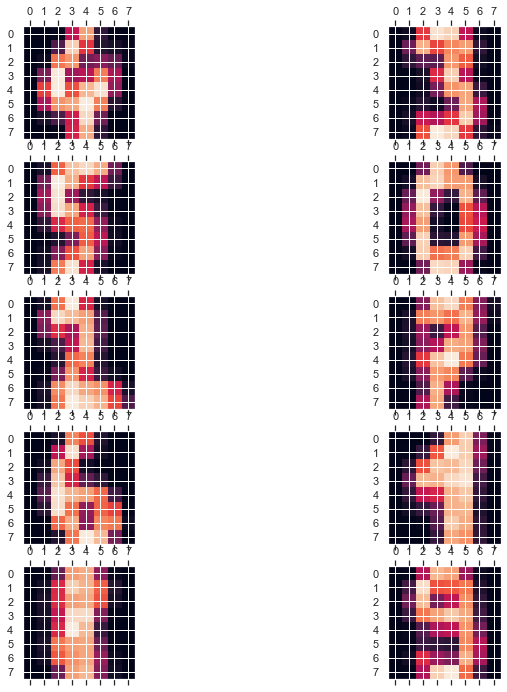

In [3]:
cluster_centers = kmeans.cluster_centers_.reshape(10, 8, 8)

fig, ax = plt.subplots(5, 2, figsize = (12, 12))

for i in range(10):
    row = i // 2
    col = i % 2
    ax[row, col].matshow(cluster_centers[i,:])

In [4]:
#1.2)
from scipy.stats import mode

x = kmeans.predict(digits['data'])
for i in range(10):
    mask = clusters[i]
    x[mask] = mode(digits.target[mask])[0]

In [5]:
#1.3) 
accuracy = accuracy_score(digits.target, x)
confusion_mat = confusion_matrix(digits.target, x)

print(accuracy)
print(confusion_mat)

0.23650528658875905
[[  2   0   0 176   0   0   0   0   0   0]
 [  0   2   1   0  24   0   2  55  98   0]
 [  0  13   0   1 148   3   0   2   8   2]
 [  0 153   2   1   0   7   0   0   7  13]
 [164   0   0   0   0  10   0   5   2   0]
 [  2   2 136   0   0   1   1   0   0  40]
 [  0   0   0   1   0   0 177   1   2   0]
 [  0   0   1   0   0 174   0   2   2   0]
 [  0   2   4   0   3   5   2   6 101  51]
 [  0   6   6   0   0   8   0  20   1 139]]


    - The accuracy of 23.7% is pretty bad as it means that 76.3% of images will be misclassified

In [6]:
#1.4) 

fowlkes_mallows_score(digits['target'], x)

0.6984843791278866

- From the sklearn documentation: The Fowlkes-Mallows index (FMI) is defined as the geometric mean between of the precision       and recall. Since, it focuses on the precision and recall, it makes sense why this score is higher.
    
- Comparatively the score from the classification report is the sum of correct classifications divided by the total number       of samples.

### 2: Image Compression second pass

Use any the clustering algorithms we see to produce what you think is the best image compression ratio that is **visually indistinguishable** from the original image (recall in the lecture the result was very compressed but also much uglier)

Justify your choice and process in 3 paragraphs.

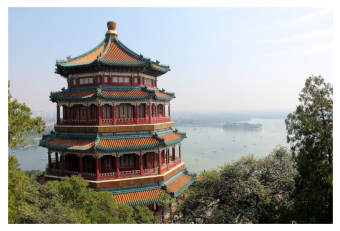

In [32]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [8]:
#Reshape the image so it contains 2 parameters
#and divide by 255 as that is the max intensity value for RGB individually

image_data = (china / 255.0).reshape(427 * 640, 3)
image_data.shape

(273280, 3)

In [9]:
#Using the code from class,I want to apply the WCSS elbow method that is used to calculate the optimal number of K
#https://predictivehacks.com/k-means-elbow-method-code-for-python/

kmeans.inertia_

1165160.2935583862

In [10]:
from sklearn.cluster import MiniBatchKMeans
wcss = []
K = [2,4,8,16,32,64,128,256,512,1024]
for k in K:
    kmeanModel = MiniBatchKMeans(n_clusters=k)
    kmeanModel.fit(image_data)
    wcss.append(kmeanModel.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=512. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=512. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=512. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=1024. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=1024. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\ProgramData\Anaconda3\lib\site-packages\sklea

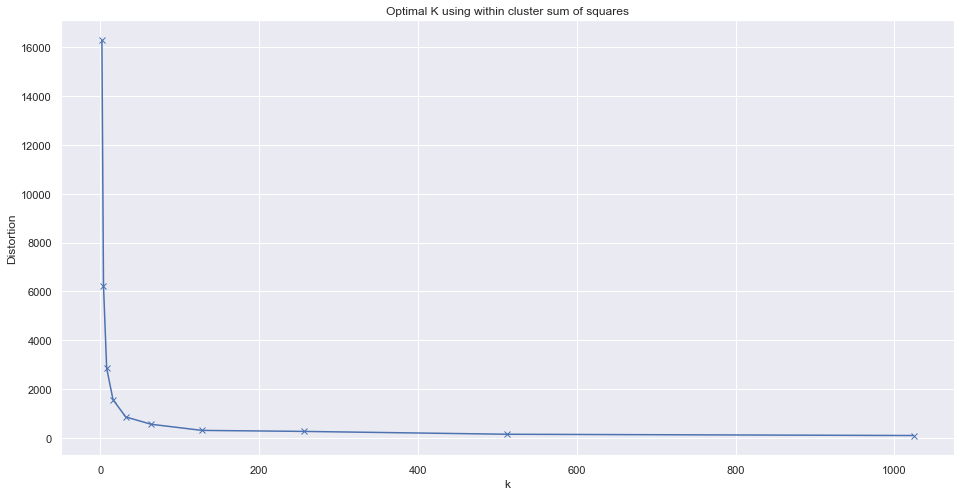

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K using within cluster sum of squares')
plt.show()

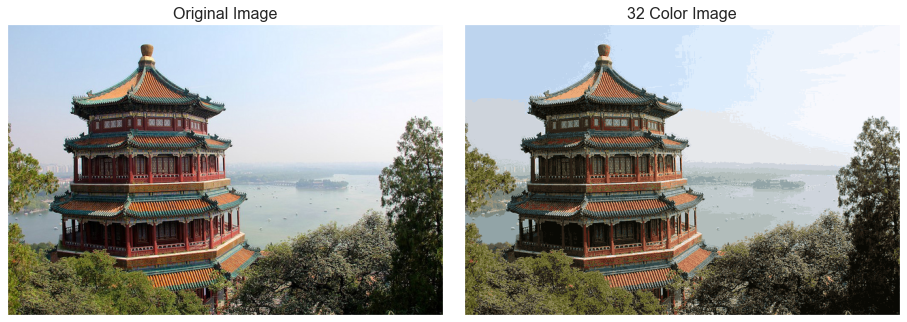

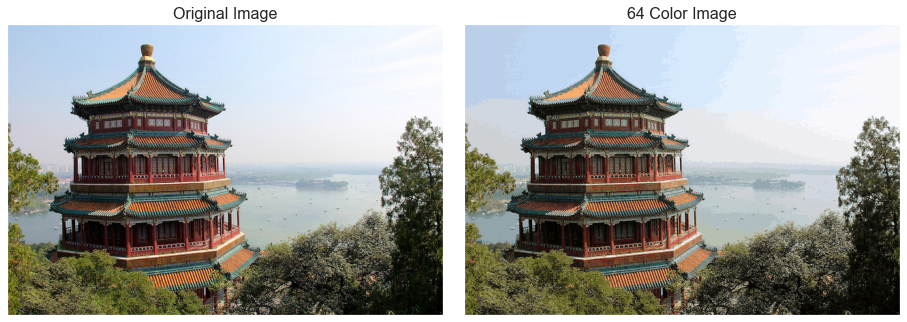

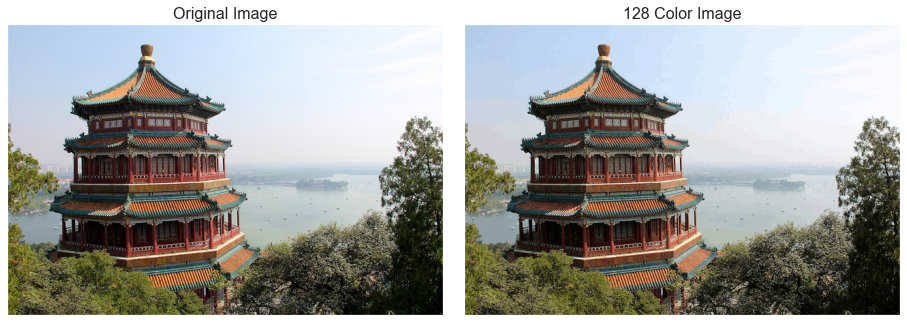

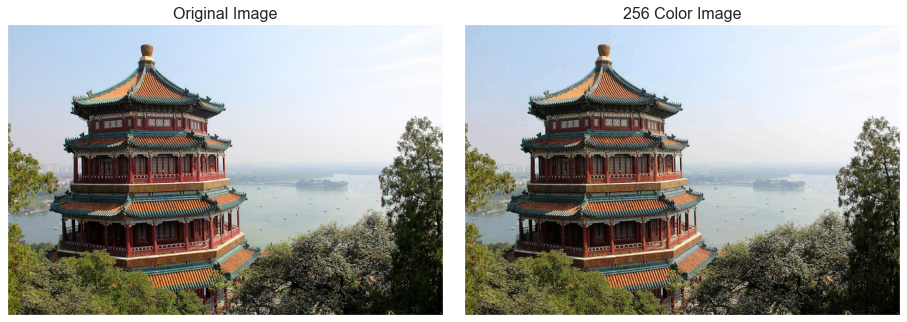

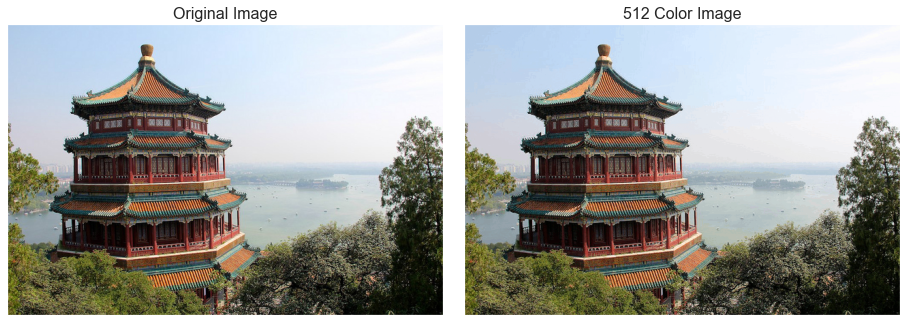

In [34]:
#Reusing the code from class
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

def img_compression(x):
    kmeans = MiniBatchKMeans(x)
    kmeans.fit(image_data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(image_data)]
    
    china_recolored = new_colors.reshape(china.shape)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(china)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(china_recolored)
    ax[1].set_title(str(x) + ' Color Image', size=16)

clusters = [32,64,128,256,512]
for i in clusters:
    img_compression(i)

Using the elbow method to run k-means clustering on a range of clusters k allows to identify the optimal number of clusters for this exercise. By calculating the sum of the squared distances from each point to its assigned centers (distortions), a graph can be made and using the results from the graph, I identified the range of clusters from where it can be seen that the photo starts becoming indistinguishable from the original (from 128 clusters onwards).

The reason I used powers of 2 was to just get a more thorough range

# 3. Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `3.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.

In [41]:
df = pd.read_csv('data/college.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [42]:
#3.1)

df['Private'] = df['Private'].replace("No", 0).replace("Yes", 1)
y = df['Private']
X = df.drop(columns=['Unnamed: 0', 'Private'])
X = preprocessing.normalize(X)

In [107]:
kmeans = KMeans(2)
clusters = kmeans.fit(X)
ypred = clusters.fit_predict(X)

In [108]:
#https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_performance_evaluation.htm
accuracy = accuracy_score(y, ypred)
confusion_mat = confusion_matrix(y, ypred)
print(accuracy)
print(confusion_mat)

#Adjusted rand index: considers all pairs of samples and counting pairs that are assigned in the similar or 
#different clusters in the predicted. 1 would be ideal and 0 worst

print(adjusted_rand_score(y, ypred))

#Mutual Information Based Score: computes the agreement of the two assignments

print(normalized_mutual_info_score (y, ypred))

#Fowlkes mallows score
print(fowlkes_mallows_score (y, ypred))

0.9047619047619048
[[155  57]
 [ 17 548]]
0.6314455121290318
0.4873009490473284
0.8635220144275176


**Observation:** The model seems to work but is a bit fluky as if I run the code multiple times, I get the accuracy value that is printed above or 1 minus the accuracy value

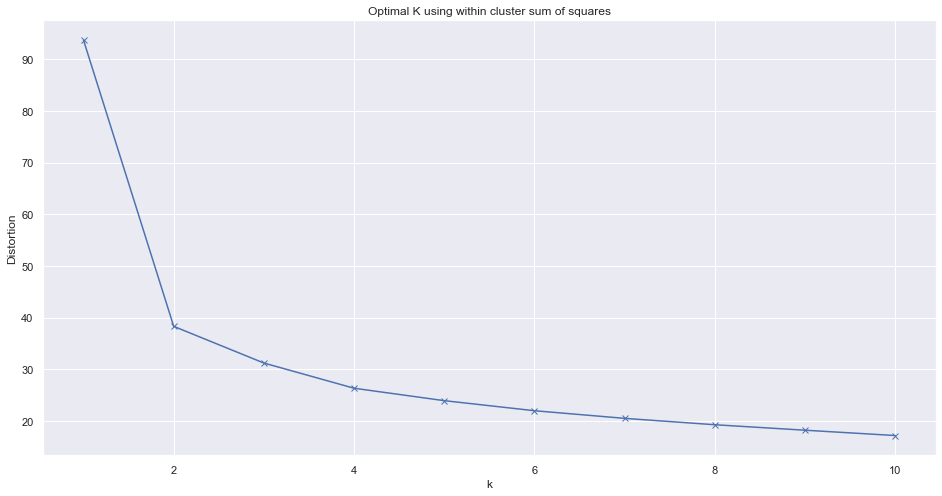

In [74]:
#3.2)
#apply elbow method again

wcss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K using within cluster sum of squares')
plt.show()

Looking at the graph and intuitively speaking, it is probably best to go with 2 clusters as we are trying to sort between Private and Public. Lets use the silhouette analysis shown in class for different numbers of clusters

For n_clusters = 2 The average silhouette_score is : 0.5599267817640777
For n_clusters = 3 The average silhouette_score is : 0.4759356725934926
For n_clusters = 4 The average silhouette_score is : 0.38208020825048794
For n_clusters = 5 The average silhouette_score is : 0.38740670959589874
For n_clusters = 6 The average silhouette_score is : 0.3081792022273833


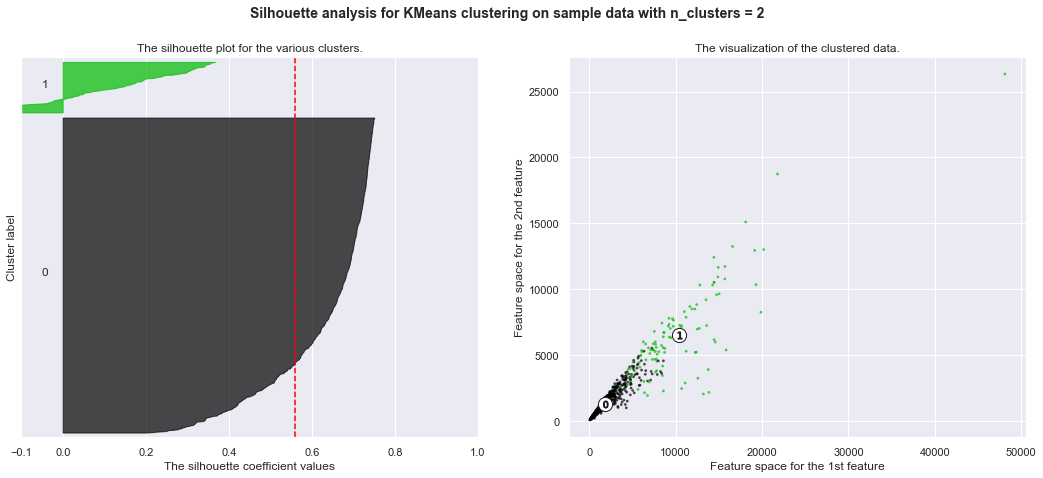

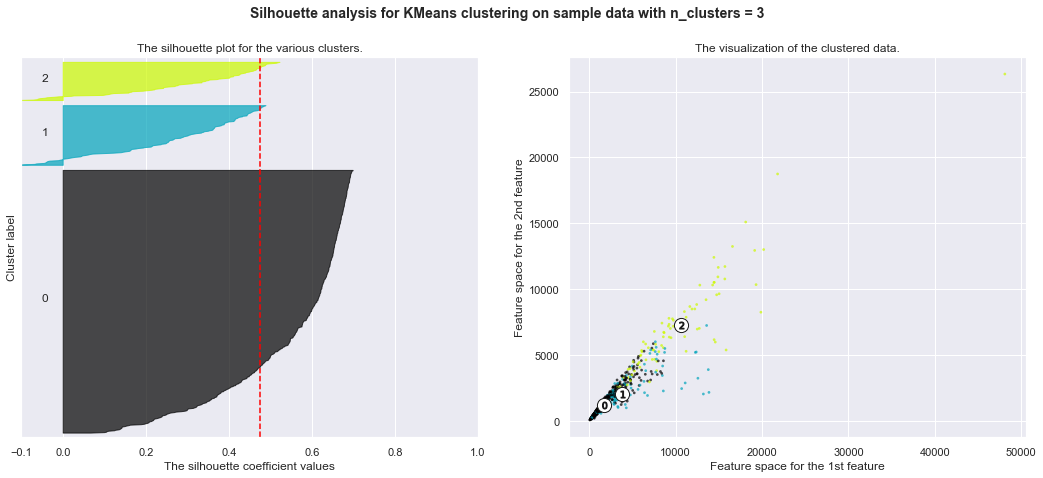

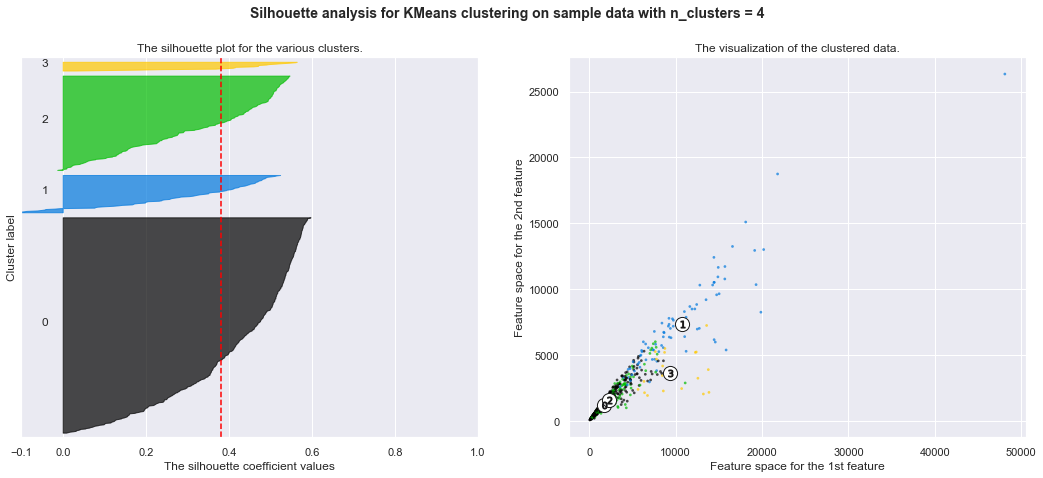

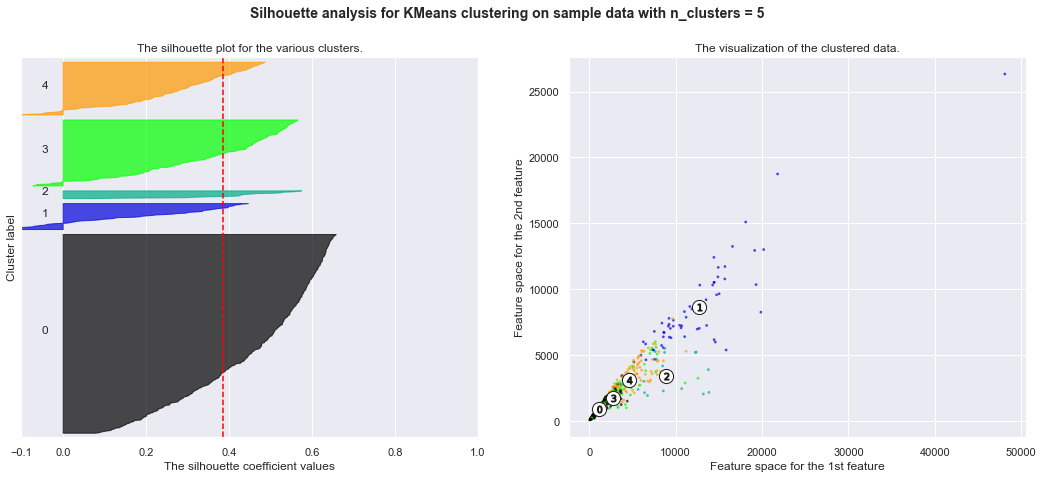

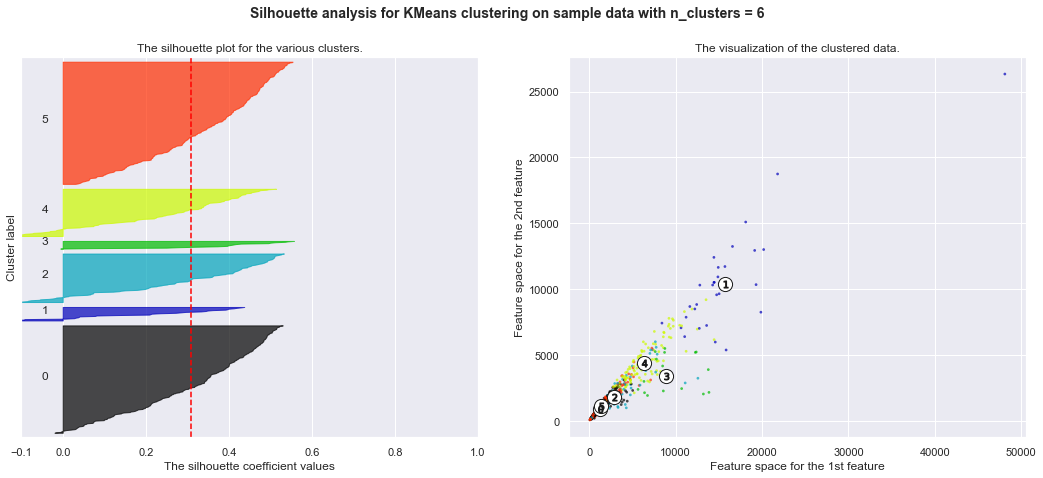

In [110]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#Code taken from class
X = df.drop(['Private', 'Unnamed: 0'],axis=1).to_numpy()
df[df['Private'] == 'Yes'] = 1
df[df['Private'] == 'No'] = 0
y = df.Private
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

#Can be seen that 2 clusters has the highest average silhouette score